In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
Base.prepare(engine,reflect=True)
# reflect the tables
measurement = Base.classes.measurement
station = Base.classes.station

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [8]:
# Find the most recent date in the data set.
last_date = session.query(measurement.date).order_by(measurement.id.desc()).first()
print(last_date[0])

2017-08-23


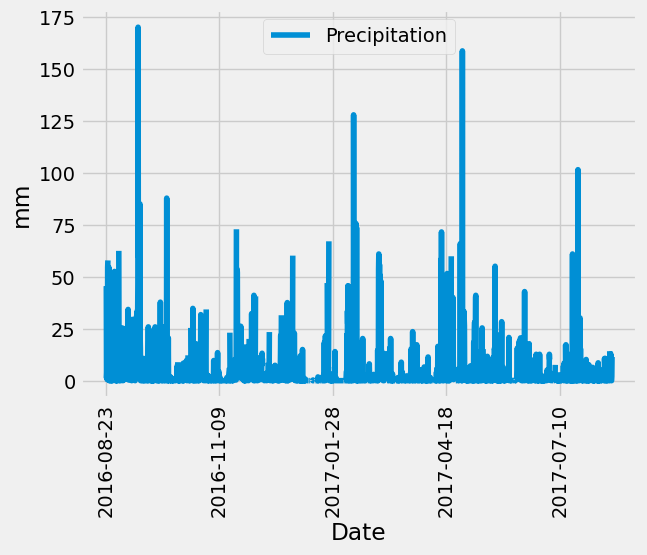

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365) 

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date,measurement.prcp).filter(measurement.date >=\
                                                                       year_ago)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation,columns=['Date','Precipitation'])

# Sort the dataframe by date
precipitation_df.sort_values(by='Date', inplace=True)
# Use Pandas Plotting with Matplotlib to plot the data
plot = precipitation_df.plot(x='Date',y='Precipitation',rot=90)
plt.xlabel("Date")
plt.ylabel("mm")
plt.show()

In [10]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [11]:
# Design a query to calculate the total number of stations in the dataset
session.query(station).count()

9

In [12]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station)\
.order_by(func.count(measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_count[0][0]

session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs))\
.filter(measurement.station==most_active_station).all()
                                                                                                                 


[(12.2, 29.4, 22.03582251082252)]

<Axes: ylabel='Frequency'>

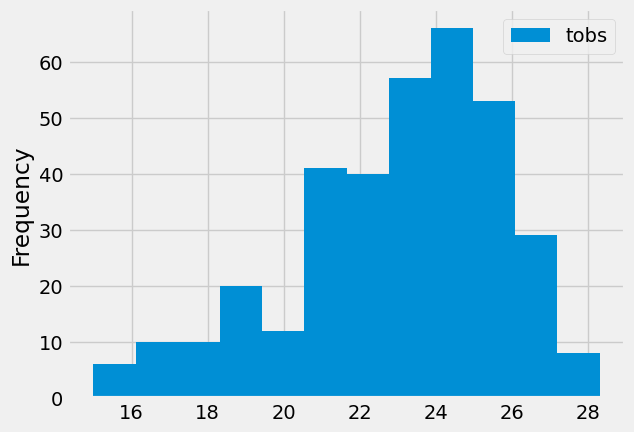

In [14]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365) 

tobs_most_active = session.query(measurement.tobs).filter(measurement.station == most_active_station)\
.filter(measurement.date>=year_ago).all()

# converting query to data frame
tobs_most_active_df = pd.DataFrame(tobs_most_active)

#plotting temperatures as histogram
tobs_most_active_df.plot.hist(bins=12)

# Close Session

In [15]:
# Close Session
session.close()